# Supervised Machine Learning - Classification

### Abstract:
   The given dataset is admission dataset. The task is to predict the percentage of students admit into universites based on Independent variables like GRE ,TOefl,CGPA etc. This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Perform Exploratory Data Analysis (EDA) tasks

In [3]:
# Visualize 10 rows
mydata = pd.read_csv("admission.csv")
mydata.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


Rename the column names:

In [4]:
mydata.rename(columns = {"Chance of Admit " : "Admit"}, inplace = True)
mydata.rename(columns = {"GRE Score" : "GRE_Score"}, inplace = True)
mydata.rename(columns = {"TOEFL Score" : "TOEFL_Score"}, inplace = True)
mydata.rename(columns = {"University Rating" : "University_Rating"}, inplace = True)

mydata.head(10)

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


#### Describe the data


In [5]:
mydata.describe()

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


#### Shape of Dataset:

In [6]:
mydata.shape

(500, 9)

In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE_Score          500 non-null    int64  
 2   TOEFL_Score        500 non-null    int64  
 3   University_Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Admit              500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


Null value:

In [8]:
mydata.isnull().sum()

Serial No.           0
GRE_Score            0
TOEFL_Score          0
University_Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admit                0
dtype: int64

#### The correlation matrix : It gives the relationship between the variables.

In [9]:
mydata_corr = mydata.corr()
mydata_corr

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE_Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL_Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University_Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


### Correlogram :
   Map the relation between variables.

Heat map:

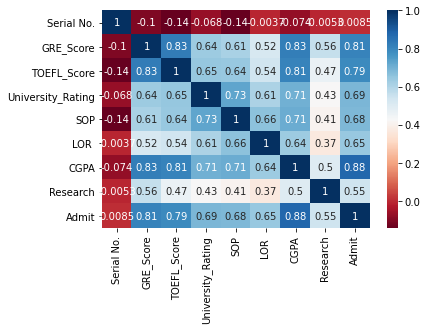

In [10]:
sns.heatmap(mydata_corr, annot = True, cmap = 'RdBu')

Pair plot:

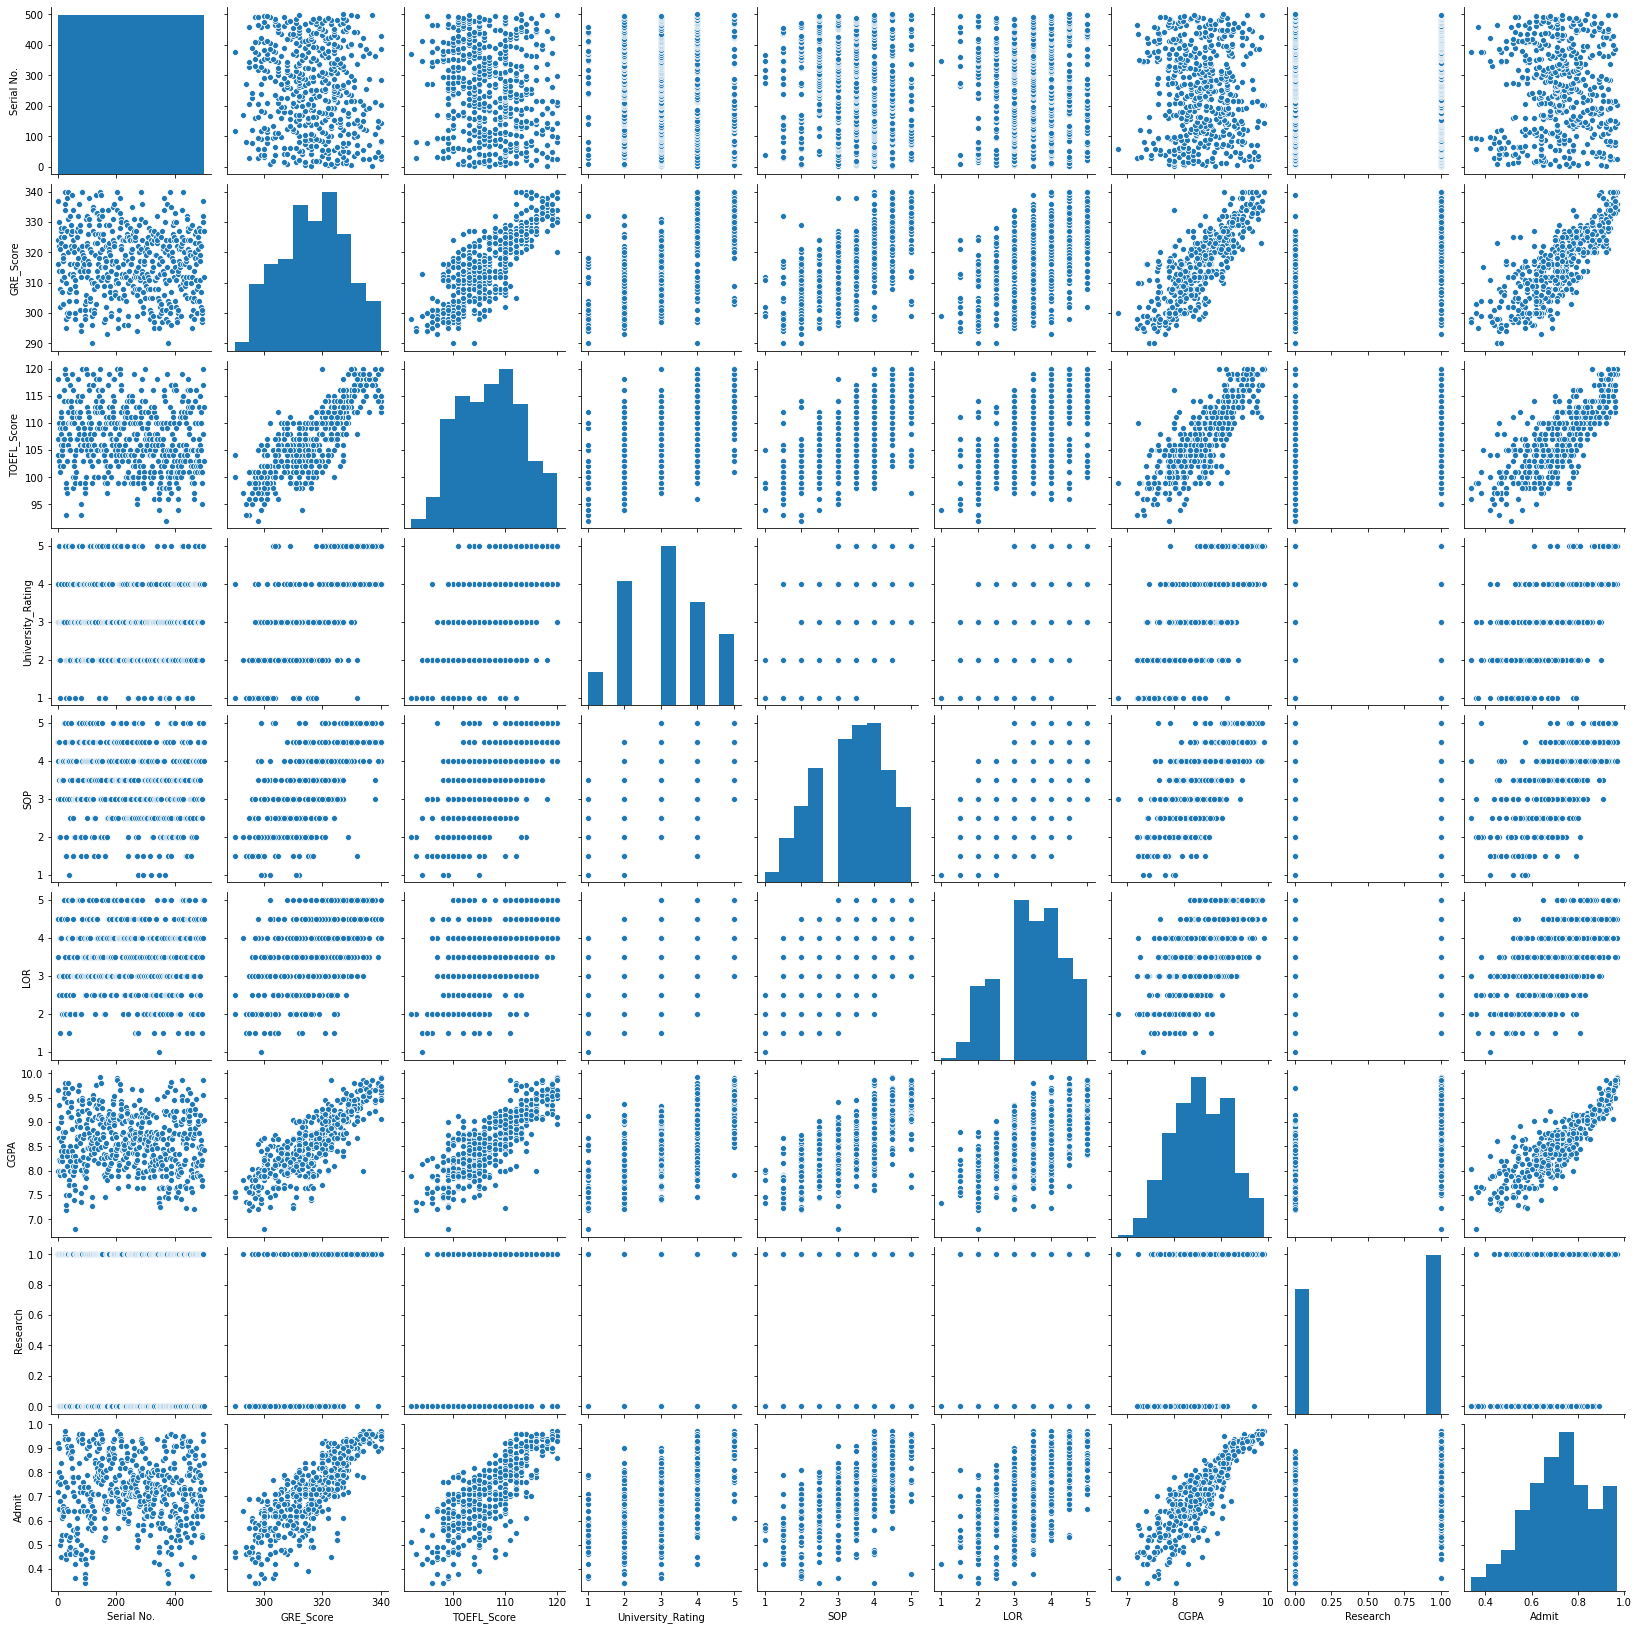

In [11]:
sns.pairplot(mydata)

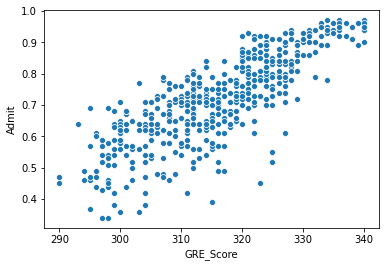

In [12]:
sns.scatterplot(x = 'GRE_Score', y = "Admit", data = mydata)
plt.show()

### The minimum and maximum values for GRE Score:



In [13]:
print("Maximum value for GRE is : ", mydata['GRE_Score'].max())
print("Minimum value for GRE is : ", mydata['GRE_Score'].min())

Maximum value for GRE is :  340
Minimum value for GRE is :  290


### Percentage of universities for each university ratings:

In [14]:
univ_percent = (mydata['University_Rating']/ mydata["University_Rating"].sum()) * 100
univ_percent.head()

0    0.256904
1    0.256904
2    0.192678
3    0.192678
4    0.128452
Name: University_Rating, dtype: float64

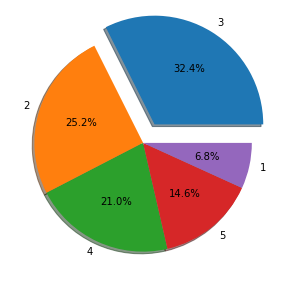

In [15]:
university_counts=mydata['University_Rating'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(university_counts,labels=university_counts.index,shadow=True,autopct='%.1f%%',explode=[0.2,0,0,0,0])
plt.show()

### Target variable to categorical variable:

##### Dependent variable:

In [16]:
y_dep = mydata['Admit']
y_dep = [1 if each > 0.80 else 0 for each in y_dep]

##### Independent variable:

In [17]:
x_ind = mydata.drop('Admit', axis = 1)
x_ind

,Serial No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research
0,1,337,118,4,4.5,4.5,9.65,1
1,2,324,107,4,4.0,4.5,8.87,1
2,3,316,104,3,3.0,3.5,8.00,1
3,4,322,110,3,3.5,2.5,8.67,1
4,5,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1
496,497,337,117,5,5.0,5.0,9.87,1
497,498,330,120,5,4.5,5.0,9.56,1
498,499,312,103,4,4.0,5.0,8.43,0


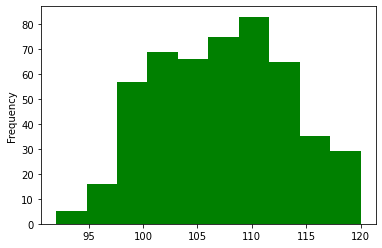

In [18]:
mydata.TOEFL_Score.plot.hist(color="green");

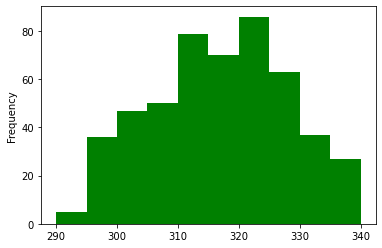

In [19]:
mydata.GRE_Score.plot.hist(color="green")

## Machine Learning: Decision Tree classifier:
   It uses tree representation to solve problem each node represent an attribute.each leaf node represents target variable. The algorithm based on ID3.It is prone to overfitting of our data.

#### Train and test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x_ind,y_dep,test_size = 0.2, random_state = 2)

In [21]:
from sklearn import tree

##### Model Fitting

In [22]:
model = tree.DecisionTreeClassifier()
model= model.fit(x_train,y_train)

#### Prediction:

In [23]:
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

#### Performance Measure:
Confusion matrix:
        Confusion Matrix can be used to calculate the performacnce metrics for a model
1.Accuracy, 2.Precision 3.Recall, 4.F1, 5. Sensitivity 


In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred)

array([[68,  5],
       [ 4, 23]])

##### Accuracy score:
   IT is the ratio of no of correct prediction to the total no of input samples. High accuracy better the model.

In [25]:
accuracy_score(y_test,y_pred)

0.91

#### The accuracy score is 88% for decision tree gini method.

### Classification  Report

Precision:
        Number of correct positive results divided by the number of positive results predicted by classifier'
        Our precision score is 0.93 close to 1.

Recall:
       Number of correct positive results by the number of relevant
       samples. Our Recall score is 0.90

F1 score:
      Mean between precision and recall. used to test accuracy. 
      Greater the score better the performace of model
      Our f1 score is 0.92

In [26]:
from sklearn.metrics  import classification_report
c_report = classification_report(y_test,y_pred)
print(c_report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        73
           1       0.82      0.85      0.84        27

    accuracy                           0.91       100
   macro avg       0.88      0.89      0.89       100
weighted avg       0.91      0.91      0.91       100



### Decision Tree Graph:

In [27]:
import graphviz # software to display DecisionTree graph
from sklearn.externals.six import StringIO # pass the input parameteres
from sklearn.tree import export_graphviz # export the software into our DT tree
import IPython # Display image
from IPython.display import Image 
import pydotplus

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [28]:
my_graph=StringIO()

In [29]:
export_graphviz(model,out_file=my_graph,filled=True,feature_names=['Serial No.', 'GRE_Score', 'TOEFL_Score	', 'University_Rating', 'SOP', 'LOR',
                                'CGPA', 'Research'])

In [30]:
graph=pydotplus.graph_from_dot_data(my_graph.getvalue())

In [31]:
graph.write_jpg("Decision_Tree.jpg") 

True

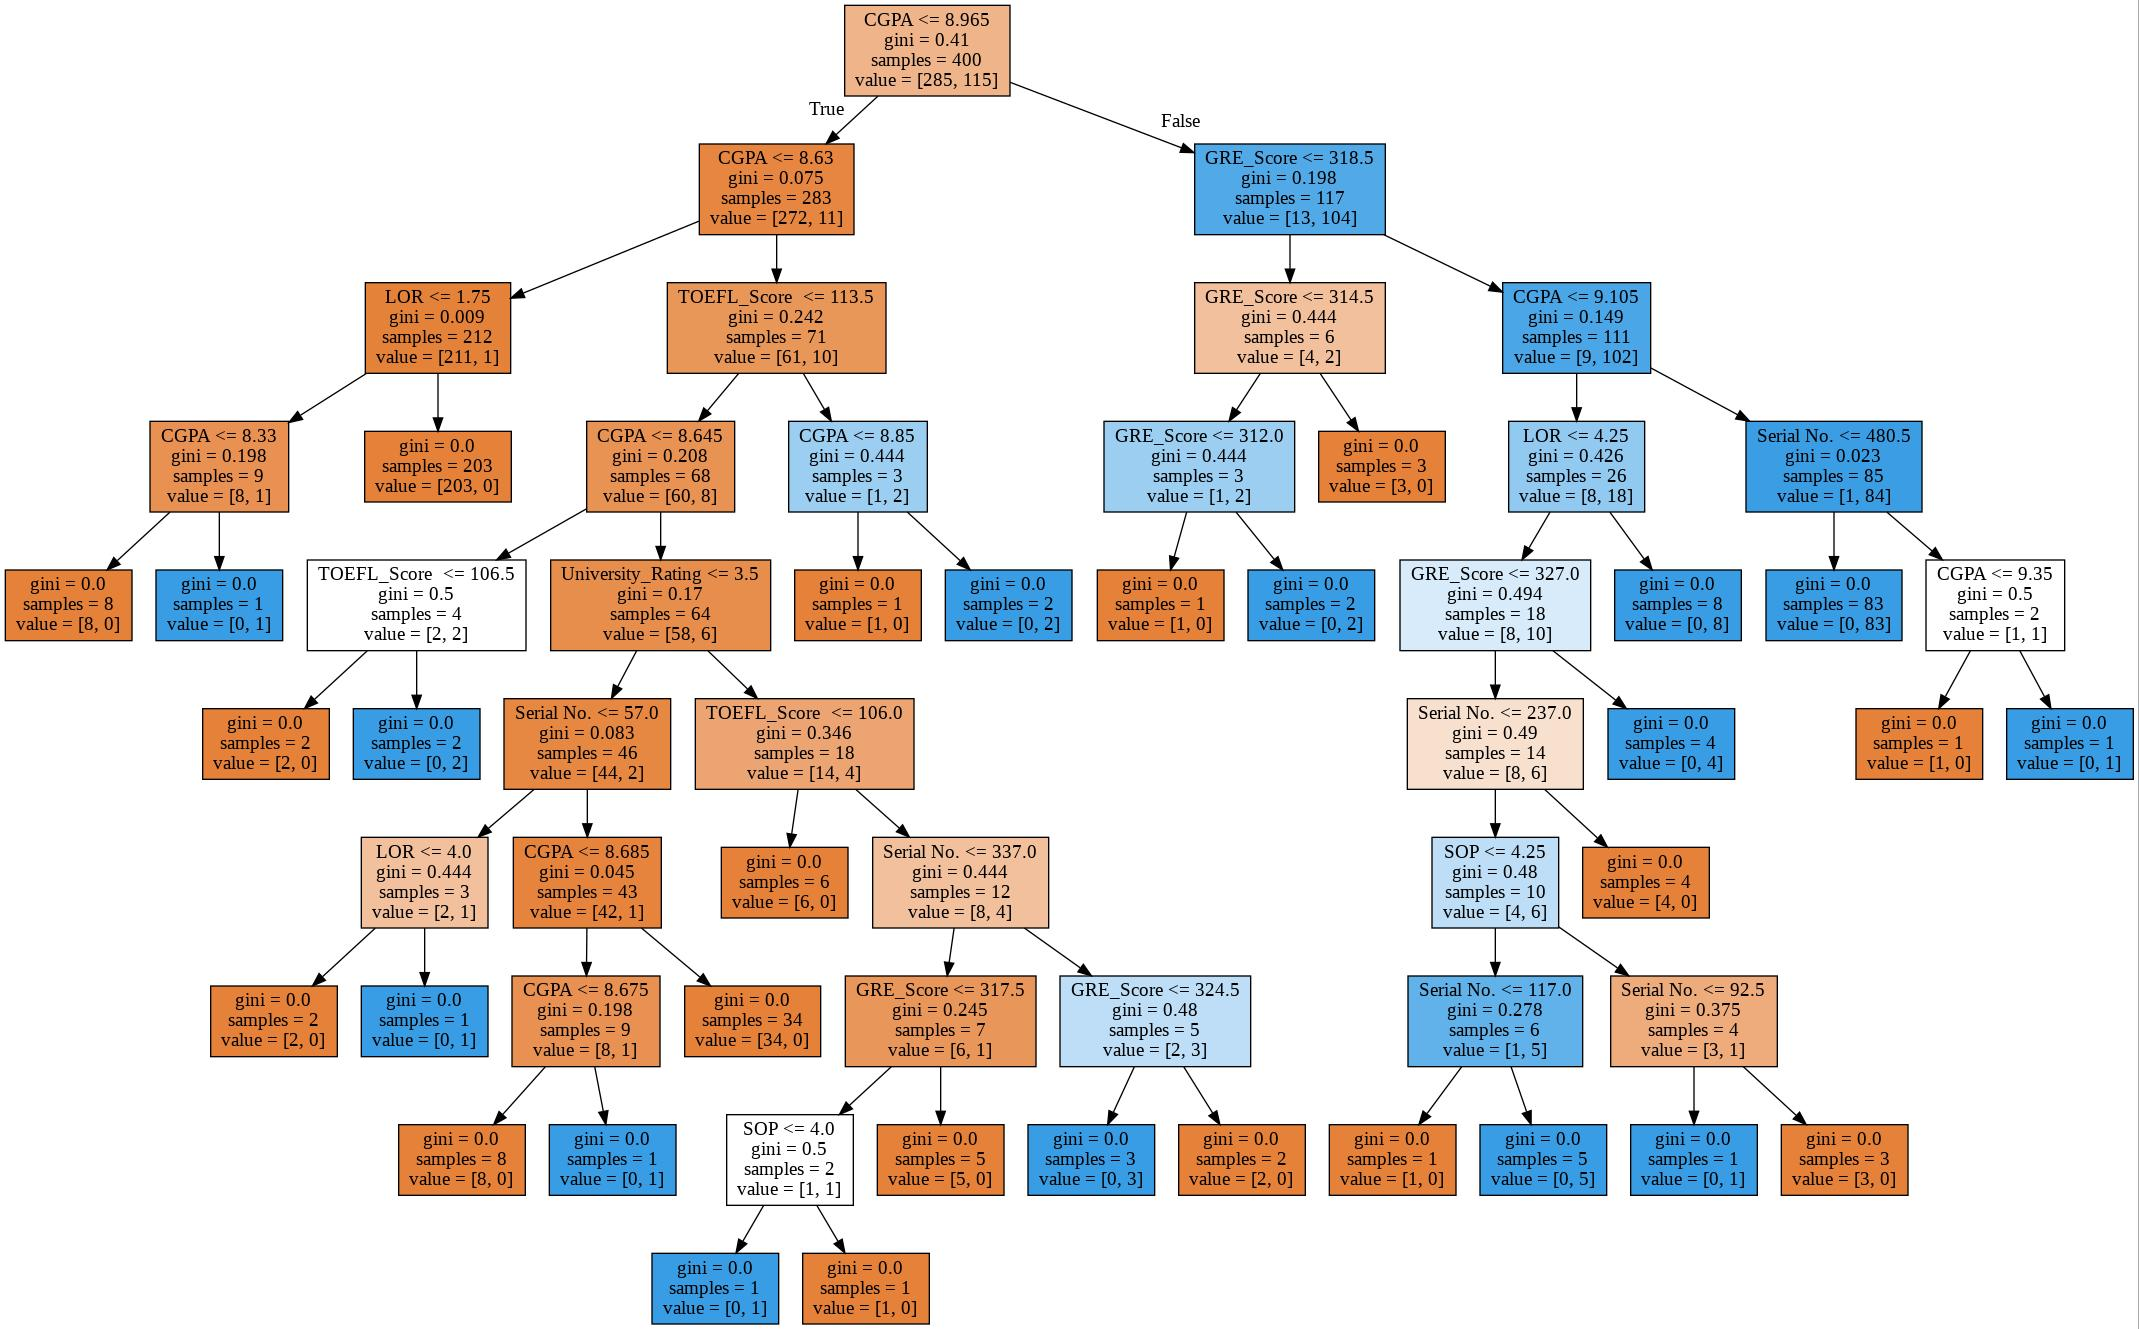

In [32]:
Image(graph.create_jpg()) 

##### Decision Tree : Entropy method

In [33]:
model_E=tree.DecisionTreeClassifier(criterion="entropy",random_state = 2)

##### Model Fit:

In [34]:
model_E=model_E.fit(x_train,y_train)

##### Prediction:

In [35]:
y_pred_E=model_E.predict(x_test)

In [36]:
y_pred_E

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

##### Confusion matrix

In [37]:
confusion_matrix(y_test,y_pred_E)

array([[65,  8],
       [ 3, 24]])

#### Accuracy score

In [38]:
accuracy_score(y_test,y_pred_E)

0.89

#### The accuracy score is 89% for decision tree entropy method.The accuracy is increased in entropy method.But to find which is better we do optimization.

##### Classification report

In [39]:
from sklearn.metrics  import classification_report
c_report = classification_report(y_test,y_pred_E)
print(c_report)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92        73
           1       0.75      0.89      0.81        27

    accuracy                           0.89       100
   macro avg       0.85      0.89      0.87       100
weighted avg       0.90      0.89      0.89       100



#### From the above model usingdecision tree entropy method our accuracy for students get into universities is 89%.F1 ,Recall, Precision:The classification report gives f1 and recall and precision values.F1 score is 92%, the gearter is better performance of model

#### Graph

In [40]:
my_graph = StringIO()

In [41]:
export_graphviz(model,out_file=my_graph,filled=True,feature_names=['Serial No.', 'GRE_Score', 'TOEFL_Score	', 'University_Rating', 'SOP', 'LOR',
                                'CGPA', 'Research'])

In [42]:
graph=pydotplus.graph_from_dot_data(my_graph.getvalue())
graph

In [43]:
graph.write_jpg("Decision_Tree.jpg")

True

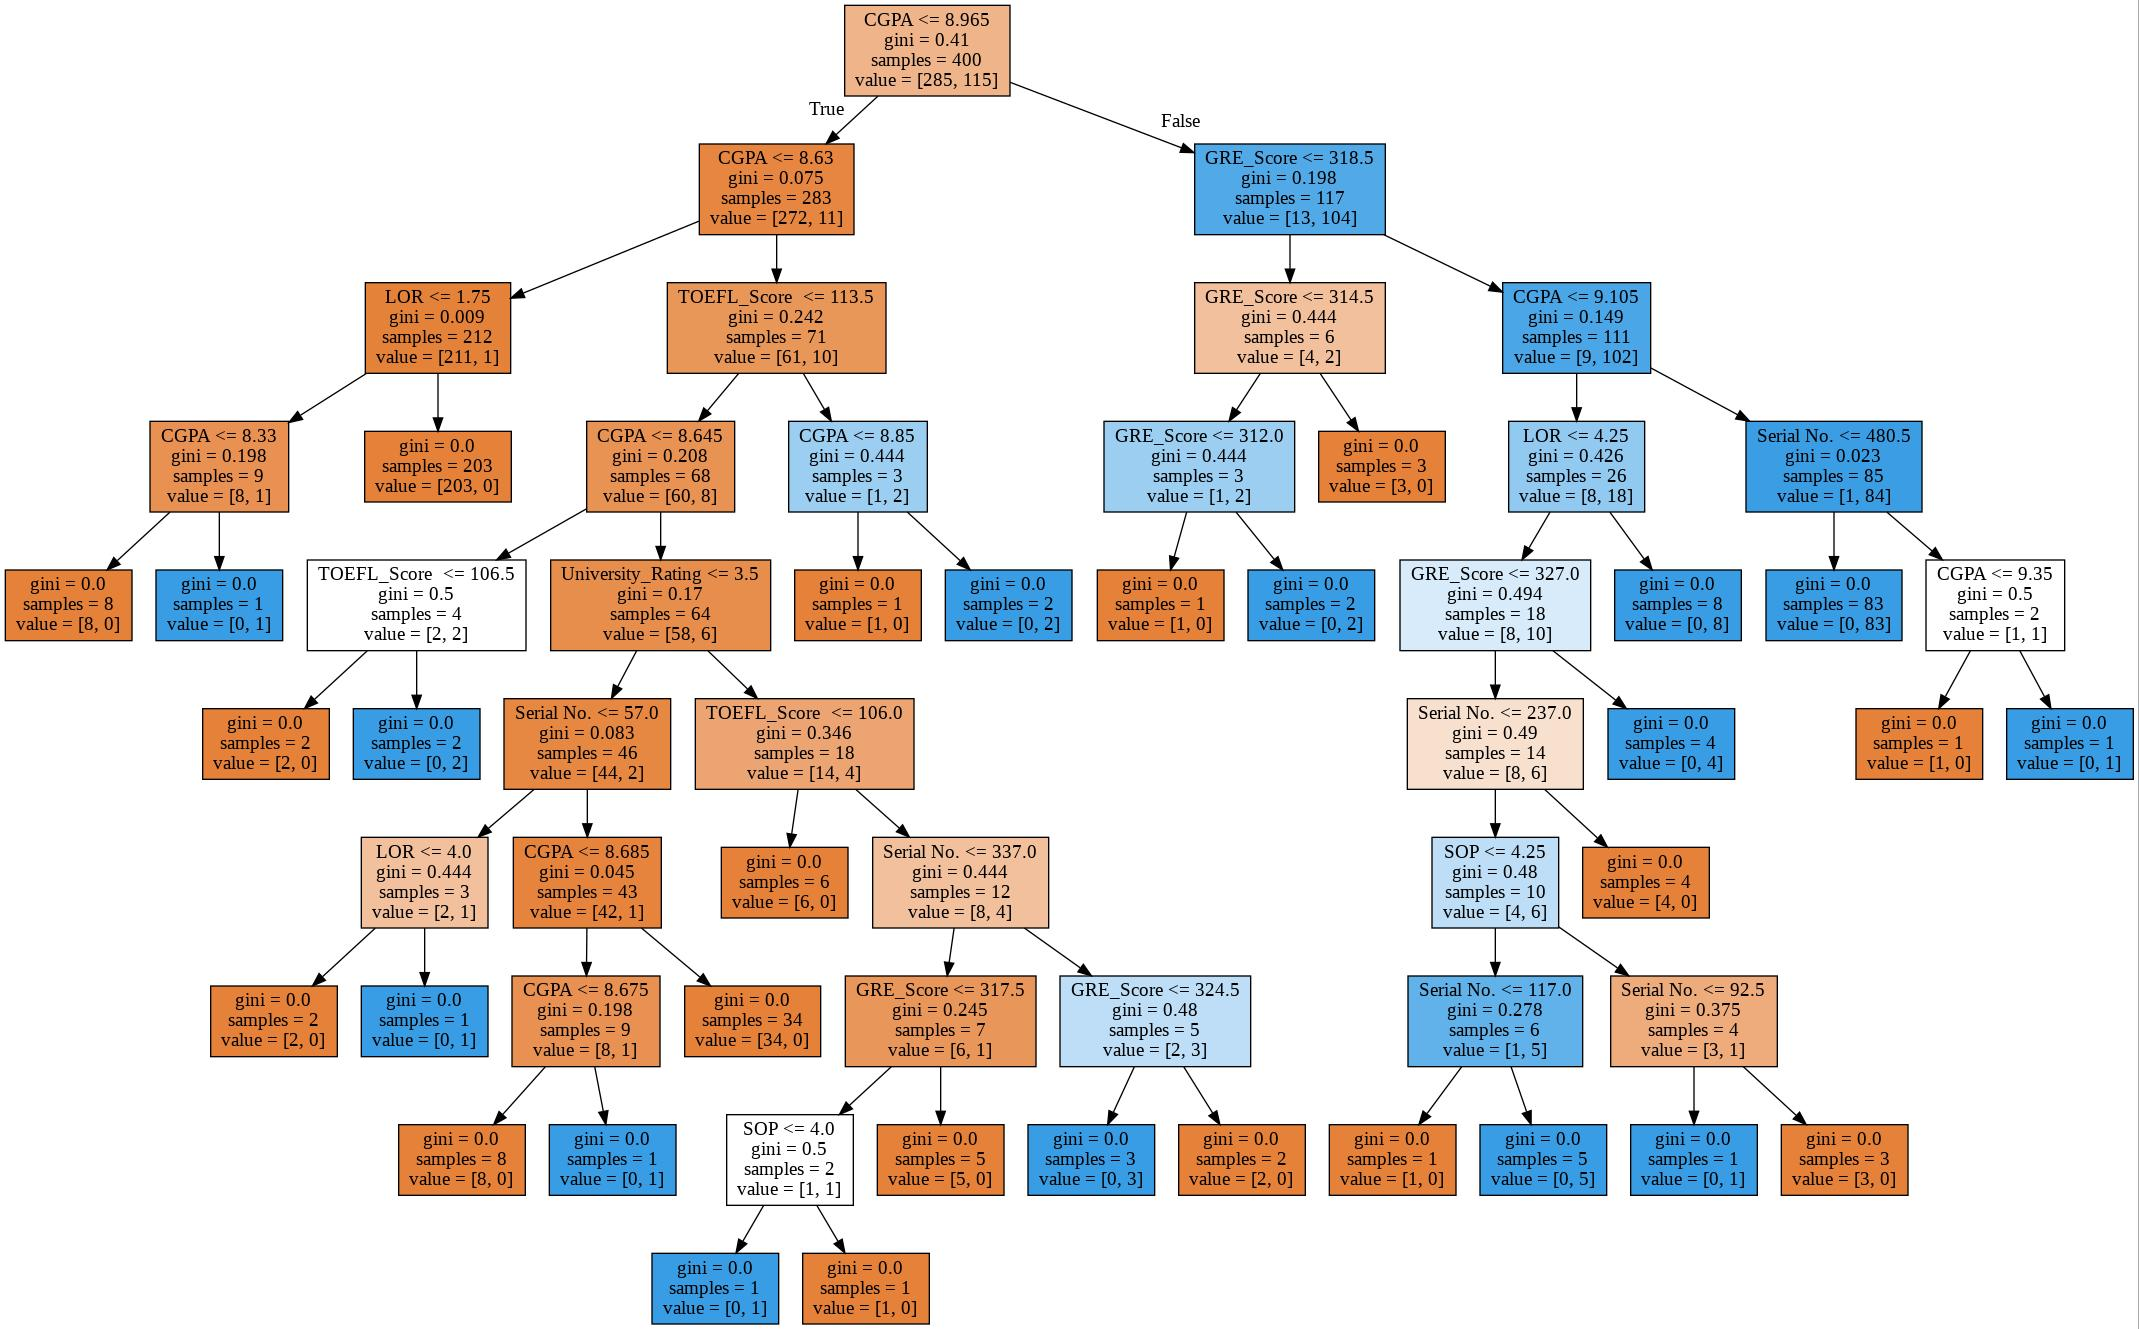

In [44]:
Image(graph.create_jpg())

### Optimization

###### Optimizer : Hyper parameter tuning
   1.It start by specify a range of possible values for all the hyperparameters.
     We are using Randomized search method. Otimization provide smaarter less expensive tuning.

Hyperparameter :
         1. max_depth, 2.min_samples_split,3.max_features,4.Criterion

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [46]:
parameters={"max_depth":(10,20,30,40,50,60,70,100),'criterion':('gini','entropy'),
            'max_features':('log2','auto','sqrt'),'min_samples_split':(2,4,6)}  # set the parameters.

In [47]:
DT_hp=RandomizedSearchCV(tree.DecisionTreeClassifier(random_state = 2),param_distributions=parameters,cv=5)

In [48]:
DT_hp.fit(x_train,y_train) 

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=2,
             

In [49]:
DT_hp.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=30, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2, splitter='best')

In [50]:
model_after_Ht=tree.DecisionTreeClassifier(criterion='gini', max_depth=30, max_features='sqrt',random_state = 2)

In [51]:
model_after_Ht=model_after_Ht.fit(x_train,y_train)

In [52]:
y_pred_after_hp=model_after_Ht.predict(x_test)

In [53]:
confusion_matrix(y_test,y_pred_after_hp)

array([[70,  3],
       [ 3, 24]])

Accuracy score:

In [54]:
accuracy_score(y_test,y_pred_after_hp)

0.94

### The accuracy score is 94%  and best estimator is gini based on optimizer. This maintain to provide constant accuracy regardless of data size.

In [55]:
from sklearn.metrics  import classification_report
c_report = classification_report(y_test,y_pred_after_hp)
print(c_report)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        73
           1       0.89      0.89      0.89        27

    accuracy                           0.94       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.94      0.94      0.94       100



### The accuracy score is 94% and best estimator is gini based on optimizer. This maintain to provide constant accuracy regardless of data size.

## Random Forest Classifier

#### Random Forest Classifier:
The concept behind random forest is Averaging. Decision Tree has grow very deep to learn irregular pattern which results is over fitting the data.

RandomForest avreage deep decision tree trained on trainset to reduce error. It will boost the performace of model.

In [26]:
from sklearn.ensemble import RandomForestClassifier

#### In this each tree get random sample of train data. each tree het random sample of column.

In [27]:
model_rf =RandomForestClassifier(random_state = 2)

##### Fit the model

In [28]:
model_rf = model_rf.fit(x_train,y_train)

In [29]:
y_pred_rf = model_rf.predict(x_test)
y_pred_rf

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

#### Performance measures:

In [62]:
confusion_matrix(y_test,y_pred_rf)

array([[70,  3],
       [ 4, 23]])

In [63]:
accuracy_score(y_test,y_pred_rf)

0.93

#### The accuracy is increased. It is 93% because when we ass trees to random forest the overfiting decreses because of bagging and random selection.More the tree better the performace.

#### Classifications Report:

In [31]:
from sklearn.metrics  import classification_report
c_report = classification_report(y_test,y_pred_rf)
print(c_report)

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        73
           1       0.88      0.85      0.87        27

    accuracy                           0.93       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.93      0.93      0.93       100



#### The accuracy for random forest is 93%. It is increased and F1 score is 95%. Recall is 96%. Precision is 95%.

### Entropy:

In [32]:
model_rfe=RandomForestClassifier(criterion="entropy",random_state = 2)

Fit the model:

In [33]:
model_rfe = model_rfe.fit(x_train,y_train)

In [34]:
y_pred_rfe = model_rfe.predict(x_test)
y_pred_rfe

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

### Performance measures:

In [35]:
confusion_matrix(y_test,y_pred_rfe)

array([[71,  2],
       [ 4, 23]])

In [36]:
accuracy_score(y_test,y_pred_rfe)

0.94

#### The accuracy is increased by usin entropy. It is 94%, when we add trees to random forest the overfiting decreses because of bagging and random selection.More the tree better the performace.

In [37]:
c_report = classification_report(y_test,y_pred_rfe)
print(c_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        73
           1       0.92      0.85      0.88        27

    accuracy                           0.94       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.94      0.94      0.94       100



#### The accuracy for random forest is 94%. It is increased and F1 score is 96%. Recall is 97%. Precision is 95%.

#### Hyperparameter Tuning

###### Optimizer:
   Hyper parameter tuning 1.It start by specify a range of possible values for all the hyperparameters. We are using Randomized search method. Otimization provide smaarter less expensive tuning.

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
parameters={"n_estimators":(200,300,400,500,600,1000),"criterion":("gini","entropy"),
           "max_features":("auto","sqrt","log2"),"min_samples_split":(2,4,6),"random_state":(0,1,2,3)}

In [40]:
RF=RandomizedSearchCV(RandomForestClassifier(),param_distributions=parameters,cv=5)

In [44]:
RF.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_features': ('auto', 'sqrt',
                                                         'log2'),
                                        'min_samples_split': (2, 4, 6),
                                        'n_estimators': (200, 300, 400, 500,
                                                         600, 1000),
                                        'random_state': (0, 1, 2, 3)})

In [45]:
RF.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_split=6,
                       n_estimators=400, random_state=1)

In [48]:
model_Ht=(RandomForestClassifier(criterion='entropy',  max_features='log2',random_state = 2))

In [50]:
model_Ht=model_Ht.fit(x_train,y_train)

In [51]:
y_pred_after_hp=model_Ht.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix,accuracy_score


##### Performance measures:

In [53]:
confusion_matrix(y_test,y_pred_after_hp)

array([[71,  2],
       [ 4, 23]])

In [54]:
accuracy_score(y_test,y_pred_after_hp)

0.94

#### The accuracy score is 94%  and best estimator is entropy based on optimizer. This maintain to provide constant accuracy regardless of data size. random forest reduce overfitting,but its algorithm is lack in time.

### Gradient technique: :
It will predict the residuals of prior models and then added together to make final prediction

In [55]:
from sklearn.ensemble import GradientBoostingClassifier

In [56]:
model_GB = GradientBoostingClassifier(random_state = 2)

In [57]:
model_GB.fit(x_train,y_train)

GradientBoostingClassifier(random_state=2)

In [58]:
y_pred_GB = model_GB.predict(x_test)
y_pred_GB

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

#### Performance measures:

In [59]:
confusion_matrix(y_test,y_pred_GB)

array([[69,  4],
       [ 3, 24]])

In [60]:
accuracy_score(y_test,y_pred_GB)

0.93

#### The accuracy score is 93 %.

In [61]:
c_report = classification_report(y_test,y_pred_GB)
print(c_report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95        73
           1       0.86      0.89      0.87        27

    accuracy                           0.93       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.93      0.93      0.93       100



### XGBoost

##### XGBoost:
Extreme Gradient Boosting.The techniques is new models are added to  correct the errors made by existing models.

In [87]:
import xgboost

In [88]:
from xgboost import XGBClassifier

In [89]:
model_XG = XGBClassifier(random_state= 2)

In [90]:
model_XG.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [91]:
y_pred_XG = model_XG.predict(x_test)
y_pred_XG

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0])

Performance measures:

In [92]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,y_pred_XG)

array([[68,  5],
       [ 3, 24]])

In [93]:
accuracy_score(y_test,y_pred_XG)

0.92

In [94]:
c_report = classification_report(y_test,y_pred_XG)
print(c_report)

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        73
           1       0.83      0.89      0.86        27

    accuracy                           0.92       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.92      0.92      0.92       100



##### ADBOOST Technique:

#### Adaboost:It focuses on classification problem and aim to redcue the week classifier into strong

In [95]:
from sklearn.ensemble import AdaBoostClassifier

In [96]:
model_AB = AdaBoostClassifier(random_state = 2)

In [97]:
 model_AB.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=2)

In [98]:
y_pred_AB = model_AB.predict(x_test)
y_pred_AB

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0])

#### Performance measures:

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix = confusion_matrix(y_test,y_pred_AB)
confusion_matrix

array([[68,  5],
       [ 2, 25]])

In [100]:
accuracy_score(y_test,y_pred_AB)

0.93

In [101]:
c_report = classification_report(y_test,y_pred_AB)
print(c_report)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        73
           1       0.83      0.93      0.88        27

    accuracy                           0.93       100
   macro avg       0.90      0.93      0.91       100
weighted avg       0.93      0.93      0.93       100



#### The accuracy for adaboost is 93%

# Conclusion:

#### Conclusion: Thus admission dataset is given to us to predict the accuracy how much students will get into universities based on their Gre score, tofel score, CGpam their independent variable. We converted contionous target variable to categorial variable like above 0.80 is admit(1). below 0.80 is not admit(0). Then we model our dataset in supervised machine learning . First we used decision tree to find the best accuracy hpw much students admit into universities and Our best estimator gini and its accuracy after optimization is 94% . We calculated Recall,F1 score, precision. In order reduce the overfitting we did another model it is radomforest classifer. It is based on taking average of all number of random decision tree. Its accuracy is 94% . Then we did ensemble sequential technique to imporve the prediction.The accuracy for gradient and XGboost and Adabooost is 93%. Thus its verifed out prediction accuracy is above 90% and it is 94%.Our model has better accuracy and 94% of prediction